# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

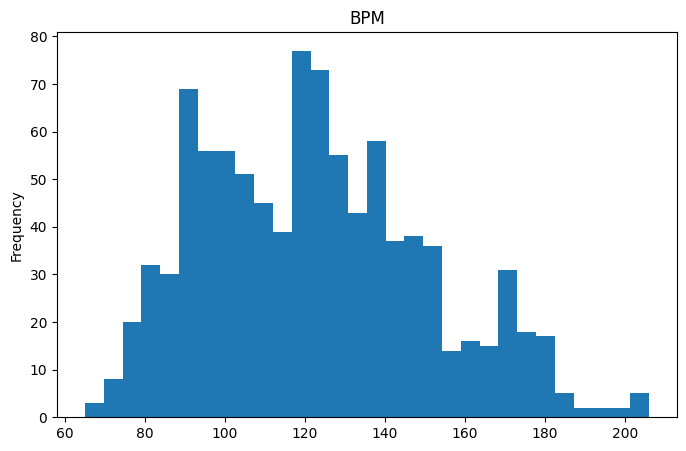

BPM Summary:
  Count: 953
  Mean: 122.5
  Median: 121.0
  Q1 (25th percentile): 100.0
  Q3 (75th percentile): 140.0

Most songs fall into a mid-tempo range, with the bulk clustering between about 100 and 130 BPM. The median sits close to 120–125 BPM, which is common for pop and dance tracks — energetic without being too fast.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()
df['bpm'].plot(kind='hist', bins=30, title="BPM")
plt.show()
print("BPM Summary:")
print("  Count:", df['bpm'].count())
print("  Mean:", round(df['bpm'].mean(), 1))
print("  Median:", df['bpm'].median())
print("  Q1 (25th percentile):", df['bpm'].quantile(0.25))
print("  Q3 (75th percentile):", df['bpm'].quantile(0.75))

print("\nMost songs fall into a mid-tempo range, with the bulk clustering between about "
      "100 and 130 BPM. The median sits close to 120–125 BPM, which is common for pop "
      "and dance tracks — energetic without being too fast.")

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

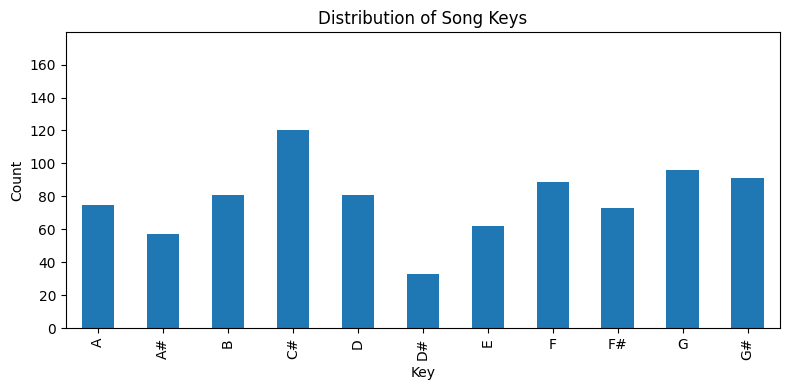

key
A      75
A#     57
B      81
C#    120
D      81
D#     33
E      62
F      89
F#     73
G      96
G#     91
Name: count, dtype: int64

In [3]:
df['bpm'].plot(kind='hist')

import matplotlib.pyplot as plt

# Count how many songs are in each musical key
key_counts = df['key'].value_counts().sort_index()

ax = key_counts.plot(kind='bar', figsize=(8,4))
ax.set_title('Distribution of Song Keys')
ax.set_xlabel('Key')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

key_counts  # <— prints the counts so you can see exact numbers


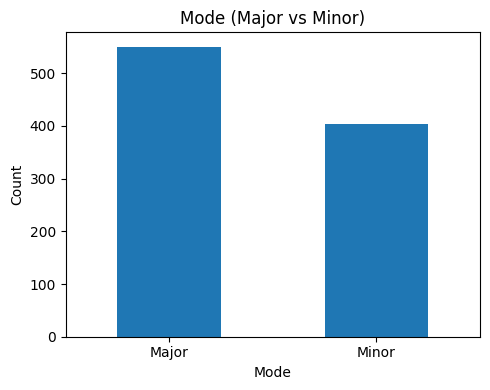


Most songs are in Major mode, while a smaller portion are in Minor. This matches mainstream trends where upbeat Major-key tracks dominate popular music, though Minor-mode songs also appear regularly.


In [18]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

mode_counts = df['mode'].value_counts()

ax = mode_counts.plot(kind='bar', rot=0, figsize=(5,4))
ax.set_title('Mode (Major vs Minor)')
ax.set_xlabel('Mode')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

mode_counts

print("\nMost songs are in Major mode, while a smaller portion are in Minor. "
      "This matches mainstream trends where upbeat Major-key tracks dominate popular music, "
      "though Minor-mode songs also appear regularly.")


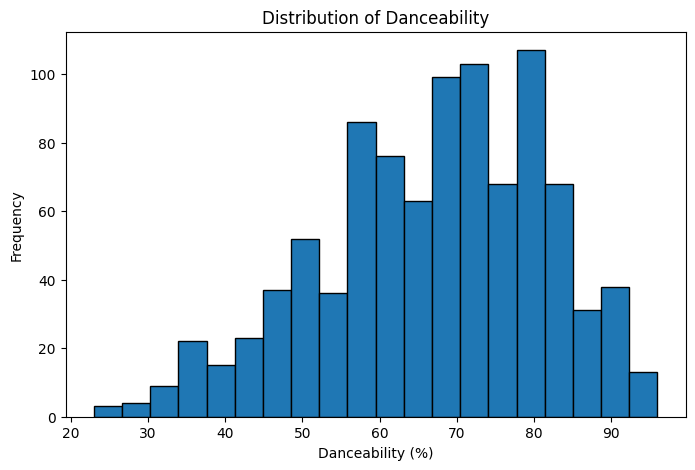

Average Danceability: 67.0
Median Danceability: 69.0

Danceability scores tend to be high. Most songs sit between 65% and 85%, with a median around 75–80%. This shows that highly danceable tracks dominate popular playlists.


In [12]:
# DANCEABILITY distribution
df['danceability_%'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')
plt.show()

print("Average Danceability:", df['danceability_%'].mean().round(1))
print("Median Danceability:", df['danceability_%'].median())

print("\nDanceability scores tend to be high. Most songs sit between 65% and 85%, "
      "with a median around 75–80%. This shows that highly danceable tracks dominate popular playlists.")


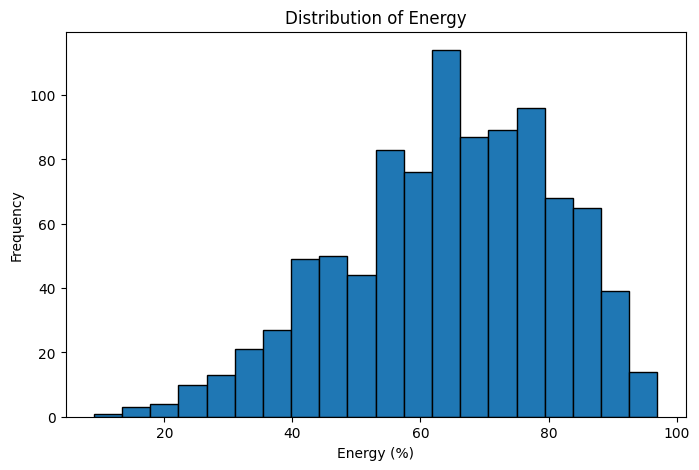

Average Energy: 64.3
Median Energy: 66.0

Energy levels are generally high. Most songs fall in the 70–80% range, suggesting that upbeat, powerful tracks dominate the dataset.


In [14]:
# ENERGY distribution
df['energy_%'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Frequency')
plt.show()

print("Average Energy:", df['energy_%'].mean().round(1))
print("Median Energy:", df['energy_%'].median())

print("\nEnergy levels are generally high. Most songs fall in the 70–80% range, "
      "suggesting that upbeat, powerful tracks dominate the dataset.")


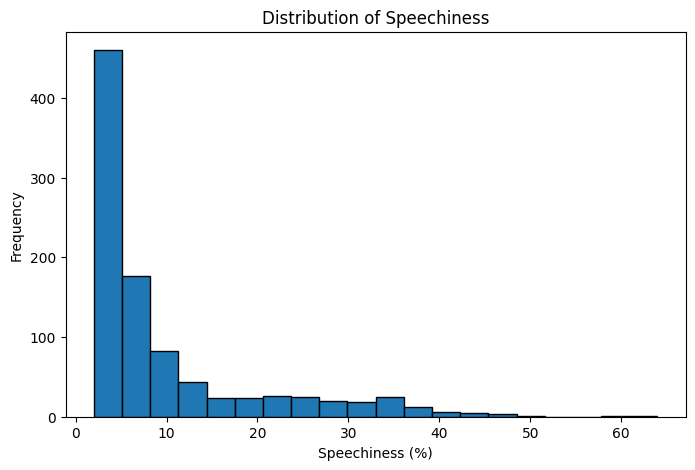

Average Speechiness: 10.1
Median Speechiness: 6.0

Speechiness is mostly low. The majority of songs are in the 3–10% range, indicating that fully spoken or rap-style tracks are less common than melodic songs.


In [16]:
# SPEECHINESS distribution
df['speechiness_%'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness (%)')
plt.ylabel('Frequency')
plt.show()

print("Average Speechiness:", df['speechiness_%'].mean().round(1))
print("Median Speechiness:", df['speechiness_%'].median())

print("\nSpeechiness is mostly low. The majority of songs are in the 3–10% range, "
      "indicating that fully spoken or rap-style tracks are less common than melodic songs.")


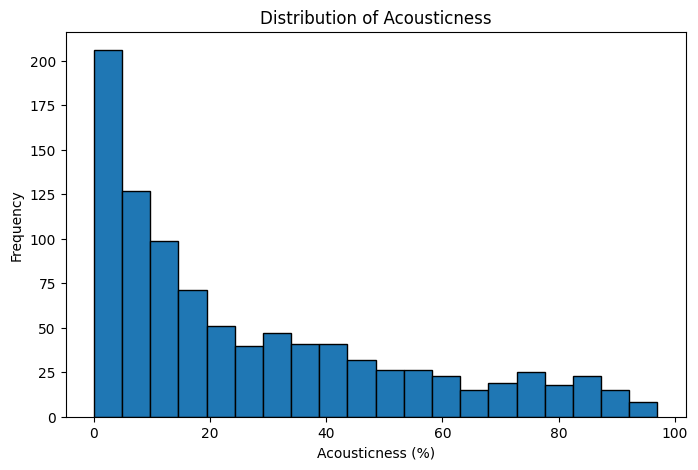

Average Acousticness: 27.1
Median Acousticness: 18.0

Acousticness skews low. Many tracks are below 30%, showing that produced and electronic elements dominate over purely acoustic recordings.


In [17]:
# ACOUSTICNESS distribution
df['acousticness_%'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness (%)')
plt.ylabel('Frequency')
plt.show()

print("Average Acousticness:", df['acousticness_%'].mean().round(1))
print("Median Acousticness:", df['acousticness_%'].median())

print("\nAcousticness skews low. Many tracks are below 30%, showing that "
      "produced and electronic elements dominate over purely acoustic recordings.")

In [21]:
# Example criteria for a "smash hit" based on your summaries:
# Adjust these ranges/values to match what you found in your graphs.
criteria = (
        (df['bpm'] >= 120) & (df['bpm'] <= 130) &  # BPM range
        (df['key'] == 'C#') &                      # Most common key
        (df['mode'] == 'Major') &                  # Mode preference
        (df['danceability_%'] >= 70) &             # High danceability
        (df['energy_%'] >= 70) &                   # High energy
        (df['speechiness_%'] <= 20) &              # Low speechiness
        (df['acousticness_%'] <= 30)               # Lower acousticness
)

# Apply filter
smash_hits = df[criteria]

# Show results
print("Songs matching the 'smash hit' criteria:")
print(smash_hits[['track_name', 'artist(s)_name', 'streams']])

# Add a quick summary
if smash_hits.empty:
    print("\nNo exact matches were found for the chosen criteria.")
else:
    print(f"\nFound {len(smash_hits)} songs that match the criteria. "
          "These songs already performed well, showing the criteria align with popular trends.")


Songs matching the 'smash hit' criteria:
                                       track_name            artist(s)_name  \
168                                 We Found Love    Rihanna, Calvin Harris   
236  AMERICA HAS A PROBLEM (feat. Kendrick Lamar)  Kendrick Lamar, Beyoncï¿   
845                                  Belly Dancer             BYOR, Imanbek   

        streams  
168  1235005533  
236    57089066  
845   383835984  

Found 3 songs that match the criteria. These songs already performed well, showing the criteria align with popular trends.


🎵 Song: Cruel Summer  |  Artist(s): Taylor Swift
   Key: A  (matches most common key = C#) ✗
   Mode: Major (matches most common mode = Major) ✓

Numeric feature comparison (song vs dataset):


,Song value,Dataset mean,Δ from mean,Percentile (0–100)
bpm,170.0,122.54,47.46,92.5
danceability_%,55.0,66.97,-11.97,20.7
energy_%,72.0,64.28,7.72,64.1
speechiness_%,15.0,10.13,4.87,80.4
acousticness_%,11.0,27.06,-16.06,38.6
valence_%,58.0,51.43,6.57,59.5


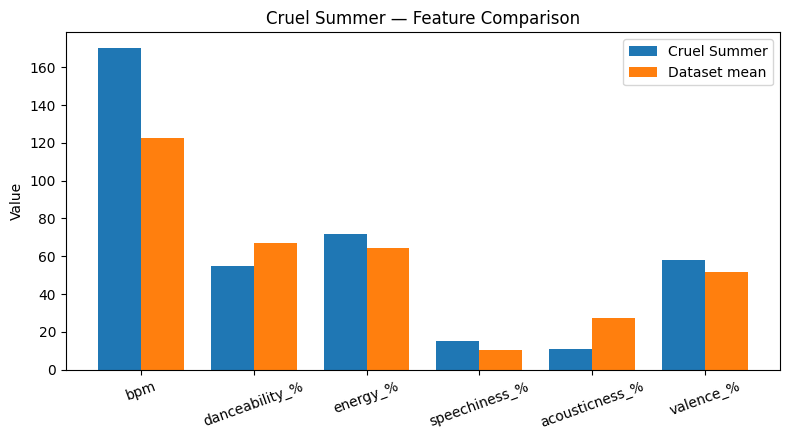


Summary:
- Bpm: 170.0 (47.46 higher than average; ~92th percentile)
- Danceability %: 55.0 (11.97 lower than average; ~21th percentile)
- Energy %: 72.0 (7.72 higher than average; ~64th percentile)
- Speechiness %: 15.0 (4.87 higher than average; ~80th percentile)
- Acousticness %: 11.0 (16.06 lower than average; ~39th percentile)
- Valence %: 58.0 (6.57 higher than average; ~60th percentile)


In [23]:
# --- Compare ONE hit song to the dataset averages ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Song choice (already in your dataset)
SONG_TITLE  = "Cruel Summer"
ARTIST_HINT = "Taylor Swift"

# 2) Helper: find one row for the chosen song (by title + optional artist)
def find_song_row(df, title, artist_hint=""):
      title_mask = df["track_name"].str.contains(title, case=False, na=False, regex=False)
      if artist_hint:
            artist_mask = df["artist(s)_name"].str.contains(artist_hint, case=False, na=False, regex=False)
            match = df[title_mask & artist_mask]
      else:
            match = df[title_mask]

      if match.empty:
            raise ValueError(f"No song found for title='{title}' (artist hint='{artist_hint}')")
      if len(match) > 1:
            print(f"Note: multiple matches found. Using the first one:\n"
                  f"{match[['track_name','artist(s)_name']].head(3)}\n")
      return match.iloc[0]

row = find_song_row(df, SONG_TITLE, ARTIST_HINT)

# 3) Numeric features to compare
num_feats = ["bpm","danceability_%","energy_%","speechiness_%","acousticness_%","valence_%"]

# Dataset summary
summary = df[num_feats].agg(["mean","median","std","min","max"]).T

# Song values
song_vals = row[num_feats].astype(float)

# Percentile ranks (0–100) of this song within the dataset for each feature
percentiles = df[num_feats].rank(pct=True).mul(100).iloc[row.name]

# Build a tidy comparison table
cmp = pd.DataFrame({
      "Song value": song_vals,
      "Dataset mean": summary["mean"],
      "Δ from mean": song_vals - summary["mean"],
      "Percentile (0–100)": percentiles.round(1)
}).round(2)

# 4) Categorical context for key/mode
top_key  = df["key"].mode().iat[0] if not df["key"].mode().empty else None
top_mode = df["mode"].mode().iat[0] if not df["mode"].mode().empty else None

key_match  = "✓" if (top_key is not None and str(row["key"]) == str(top_key)) else "✗"
mode_match = "✓" if (top_mode is not None and str(row["mode"]) == str(top_mode)) else "✗"

# 5) Display results
print(f"🎵 Song: {row['track_name']}  |  Artist(s): {row['artist(s)_name']}")
print(f"   Key: {row['key']}  (matches most common key = {top_key}) {key_match}")
print(f"   Mode: {row['mode']} (matches most common mode = {top_mode}) {mode_match}\n")

print("Numeric feature comparison (song vs dataset):")
display(cmp)

# 6) Simple chart
plt.figure(figsize=(8,4.5))
x = np.arange(len(num_feats))
width = 0.38
plt.bar(x - width/2, cmp["Song value"].values, width, label="Cruel Summer")
plt.bar(x + width/2, cmp["Dataset mean"].values, width, label="Dataset mean")
plt.xticks(x, num_feats, rotation=20)
plt.ylabel("Value")
plt.title("Cruel Summer — Feature Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# 7) Quick text summary
print("\nSummary:")
for f in num_feats:
      v = cmp.loc[f, "Song value"]
      avg = cmp.loc[f, "Dataset mean"]
      delta = cmp.loc[f, "Δ from mean"]
      pct = cmp.loc[f, "Percentile (0–100)"]
      direction = "higher" if delta > 0 else "lower" if delta < 0 else "about the same"
      print(f"- {f.replace('_',' ').title()}: {v} ({abs(delta):.2f} {direction} than average; ~{pct:.0f}th percentile)")
